# Machine Learning Study week 8

# Hands - on Machine Learning with Scikit-Learn & TensorFlow

기본 설정

In [1]:
import numpy as np ##배열, 3장에서는 DataFrame은 다루지 않음
import os  ##사실 3장에서는 필요 없음
import matplotlib ##그림용
import matplotlib.pyplot as plt ##그림용
import sklearn ##사이킷런

np.random.seed(42) ##랜덤시드 

matplotlib.rc('font', family='NanumBarunGothic') ##matplotlib 한글을 위해
plt.rcParams['axes.unicode_minus'] = False ##한글을 위해

# 3장 분류

## 3.1 Introduction

- 가장 일반적인 지도 학습 작업은 회귀(값 예측)와 분류(클래스 예측)이다.
- 2장에서는 주택 가격을 예측하는 회귀 작업을 했고, 선형 회귀, 결정 트리, 랜덤 포레스트 알고리즘을 보았다
- 3장에서는 분류 시스템을 집중적으로 다룬다.

***

## 3.1 MNIST

In [2]:
from sklearn.datasets import fetch_openml ##책과 다름. 유의
mnist = fetch_openml('mnist_784', version=1) ##mnist는 Bunch라는 자료구조
X, y = mnist["data"], mnist["target"] ##numpy의 배열로 저장
y = y.astype(np.int) ##mnist의 target이라는 key안에는 value가 문자열로 저장되어 있음. int로 바꿔줘야함.
###읭스럽게도 4번 돌리면 opemml.org에 data가 생김

- 이 장에서는 숫자 이미지를 모은 MNIST 데이터셋을 사용

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
help(sklearn.utils.Bunch)

Help on class Bunch in module sklearn.utils:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 

결국 Bunch와 dictionary와의 차이는 Bunch가 value를 부를 때, A.key 라는 식으로 value를 부를 수 있는 정도인듯 하다.

In [5]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [6]:
X.shape ##784 = 28*28 (픽셀)

(70000, 784)

In [7]:
y.shape

(70000,)

- 데이터 하나를 잡아서 그려보자

In [8]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

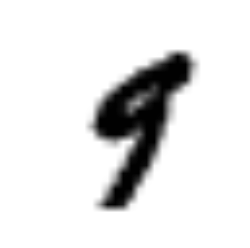

In [9]:
%matplotlib inline

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28) ### image 픽셀의 형태대로 shape를 만듦
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="bilinear")
###matplotlib.cm.binary: 색 입히는 방식.색을 흰색에서부터 검은색으로 칠해줌
###interpolation의 default값이 nearest임
plt.axis("off")

plt.show()

In [10]:
x= np.array([[1,2,3],[4,5,6],[7,8,9]])
type(x.copy)

builtin_function_or_method

In [11]:
0 == False

True

In [12]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, *, data=None, **kwargs)
    Display an image, i.e. data on a 2D regular raster.
    
    Parameters
    ----------
    X : array-like or PIL image
        The image data. Supported array shapes are:
    
        - (M, N): an image with scalar data. The data is visualized
          using a colormap.
        - (M, N, 3): an image with RGB values (float or uint8).
        - (M, N, 4): an image with RGBA values (float or uint8), i.e.
          including transparency.
    
        The first two dimensions (M, N) define the rows and columns of
        the image.
    
        The RGB(A) values should be in the range [0 .. 1] for floats or
        [0 .. 255] for integers.  Out-of-range values will be clipped to
        these bounds.
    
   

In [13]:
help(matplotlib.cm.binary)

Help on LinearSegmentedColormap in module matplotlib.colors object:

class LinearSegmentedColormap(Colormap)
 |  LinearSegmentedColormap(name, segmentdata, N=256, gamma=1.0)
 |  
 |  Colormap objects based on lookup tables using linear segments.
 |  
 |  The lookup table is generated using linear interpolation for each
 |  primary color, with the 0-1 domain divided into any number of
 |  segments.
 |  
 |  Method resolution order:
 |      LinearSegmentedColormap
 |      Colormap
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, segmentdata, N=256, gamma=1.0)
 |      Create color map from linear mapping segments
 |      
 |      segmentdata argument is a dictionary with a red, green and blue
 |      entries. Each entry should be a list of *x*, *y0*, *y1* tuples,
 |      forming rows in a table. Entries for alpha are optional.
 |      
 |      Example: suppose you want red to increase from 0 to 1 over
 |      the bottom half, green to do the same over t

- 실제 값 확인해보자

In [14]:
y[36000]

9

.

- 원래는 훈련 세트와 테스트 세트를 2장에서 했던 것처럼 나눠야한다.
- 하지만 MNIST 데이터셋은 이미 나눠져있음.

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

- 아마 개정 전 데이터셋은 y_train값이 섞여있지 않은 듯.
- 지금 데이터들은 순서가 섞여있다.

In [16]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 3.2 이진 분류기 훈련

- 여기서는 5와 나머지를 분류하는 모델을 만든다.

- 일단 데이터 셋과 테스트 셋에서 target이 5인 객체들을 알아보자.

In [17]:
y_train_5 = (y_train == 5) ##bool 값으로 나옴
y_test_5 = (y_test == 5)

In [18]:
y_train_5

array([False, False, False, ..., False, False, False])

In [19]:
##확률적 경사 하강법을 쓰자.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42) ##4단원에서  조지자.
sgd_clf.fit(X_train, y_train_5) ##fit 메소드를 사용, 각 객체 변수에 특정 값들을 저장.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit, X[1]]) ##some_digit은 (1, 784) 배열
##some_digit이 5인가 ==> false
##X_train으로 훈련했고, some_digit은 X의 한 행임으로 sgd_clf가 봤던  샘플이 아님.

array([False, False])

In [21]:
type(sgd_clf.predict)

method

In [22]:
type(sgd_clf)

sklearn.linear_model.stochastic_gradient.SGDClassifier

## 3.3 성능 측정

- 분류기 평가는 보통 회귀 모델보다 훨씬 어려움

### 3.3.1 교차 검증을 사용한 정확도 측정

- 교차 검증을 코드로 구현

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)  ###랜덤 시드 42로 총 3번 train set과 test set을 나눔

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) ###sgd_clf의 clone을 만듦
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold) ##bool 값을 sum하면 true의 개수가 나옴. 사실 파이썬에서 True=1, False=0
    print(n_correct / len(y_pred)) ## scoring =' accuracy'

0.9605
0.95595
0.95375


In [24]:
sum(np.array([True, True, True, False]))

3

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
## scoring ='acuracy' 는 맞은 개수 나누기 전체 개수

array([0.9605 , 0.95595, 0.95375])

- 샘플의 개수가 차이가 많이나는 분류기에서 교차검증은 효과적이지 못함

- 예를 들어 모든 것을 5가 아니라고 말하는 분류기를 만들어서 교차검증을 해보자

In [26]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None): ##cross_val_score에 들어가면서 필요함
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [27]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
###cross_val_score 안에 자동으로 fit 매소드와 .predict 객체변수를 불러오는 듯

array([0.909  , 0.90745, 0.9125 ])

### 3.3.2 오차 행렬

- 교차 검증말고 다른 지표를 써야한다. 그 중 하나가 오차 행렬

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
## cv=3이니깐 데이터 셋을 1,2,3으로 나누고
##1,2 vs 3 & 1,3 vs 2 $ 2,3 vs 1를 하고
##우측에 있는 예측 값들을 씀

In [29]:
type(y_train_pred)

numpy.ndarray

In [30]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [31]:
type(cross_val_predict) ##객체 변수로 부르면 method, class.method로 부르면 function

function

In [32]:
help(cross_val_predict)

Help on function cross_val_predict in module sklearn.model_selection._validation:

cross_val_predict(estimator, X, y=None, groups=None, cv='warn', n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', method='predict')
    Generate cross-validated estimates for each input data point
    
    It is not appropriate to pass these predictions into an evaluation
    metric. Use :func:`cross_validate` to measure generalization error.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit' and 'predict'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used w

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52972,  1607],
       [  989,  4432]], dtype=int64)

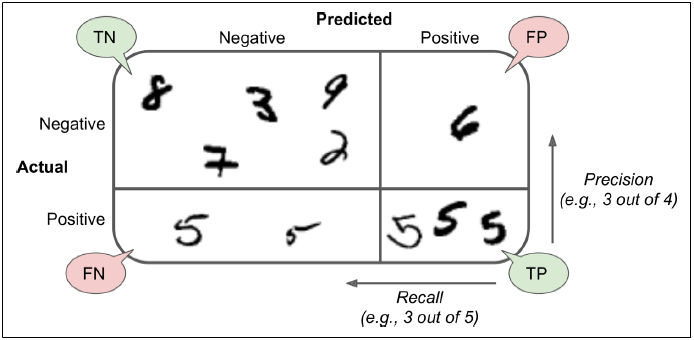

행: 실제 클래스, 열: 예측 클래스


TN 진짜 음성   
FP 거짓 양성   
FN 거짓 음성     
TP 진짜 양성   


예측을 기준으로 생각

###### 정밀도 = TP/(TP + FP)

###### 재현율 = TP/(TP + FN)

###### 그냥 TP/(TP + FP + FN) 을 하면 안되나?

의미가 없음. 왜냐면 적절한 threshold 값을 구하고 싶은건데  
TP/(TP + FP + FN)은 threshold에 따른 오차의 변화가 잘 느껴지지 않음.

### 3.3.3 정밀도와 재현율

- 정밀도와 재현율을 구하는 함수가 있음

In [34]:
from sklearn.metrics import precision_score, recall_score

print (precision_score(y_train_5, y_train_pred))
print (recall_score(y_train_5, y_train_pred))

0.7338963404537175
0.8175613355469471


- F1 점수: 두 분류기를 비교할 때, 정밀도와 재현율을 하나의 숫자로 만들어서 비교함. 그 때 쓰는 값.

- 정밀도와 재현율이 비슷한 분류기에서는 F1 점수가 높음

- 하지만 상황에 따라 정밀도가 중요한 상황과 재현율이 중요한 상황이 있다.

#### Q. 정밀도가 중요한 상황과 재현율이 중요한 상황을 서술하시오. 

.

In [35]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7734729493891798

정밀도 - 거짓을 잘 구분해냄, 하지만 참을 놓침  
재현율 - 거짓을 잘 구분하지 못함. 하지만 참을 잘 구분함.

참이라고 말한 것 중 참인 것 => 정밀도     
거짓인 것 중 거짓이라고 말한 것 ==> 정밀도

참인 것 중 참이라고 말한 것 => 재현율     
거짓이라고 말한 것 중 거짓인 것 => 재현율 

### 3.3.4 정밀도/재현율 트레이드 오프

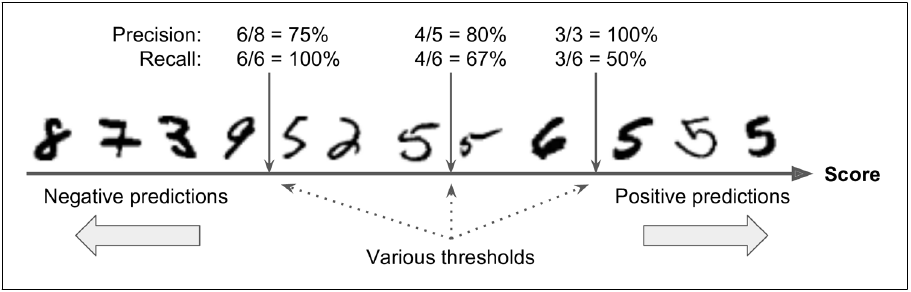

- FP 감소 & FN 증가 <=> 정밀도, FP 증가 & FT 감소 <=> 재현율

- 결과적으로 두 지표는 트레이트 오프 관계이다.

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,\
                            method="decision_function") 
##어떤 식으로 threshold를 계산하는지는 모름.
##나중에 4단원에서 안나오면 다시 공부하기.

In [37]:
y_scores.shape

(60000,)

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [39]:
help(precision_recall_curve)

Help on function precision_recall_curve in module sklearn.metrics.ranking:

precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)
    Compute precision-recall pairs for different probability thresholds
    
    Note: this implementation is restricted to the binary classification task.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold.  This ensures that the graph starts on the
    y axis.
    
    Re

In [40]:
print (type(precisions), type(recalls), type(thresholds))
print (len(precisions), len(recalls), len(thresholds))
print (np.sort(y_scores))
print (np.sort(thresholds))
print (len(np.unique(y_scores)))
###Q1. 왜 thresholds는 하나가 적을까? 
###Q2. y_scores와 thresholds는 왜 차이가 날까?
####A1. 밑에서
#### A2. TF의 변화가 있을 때까지 threshold가 나오지 않음

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
59696 59696 59695
[-2971577.63808833 -2805454.32621884 -2657357.5057543  ...
   949804.17166689   967758.32875719  1075693.60395262]
[-1652198.87312432 -1649262.25561156 -1648466.62976267 ...
   949804.17166689   967758.32875719  1075693.60395262]
60000


#### threshold가 매우 크다면
1. FP에 있는 샘플이 0에 가깝다.
2. score가 가장 높은 것이 FN 혹은 TP에 있을 것.   
    2-1 정밀도
          FN에 있다면 0/(0+1) = 0
          TP에 있다면 1/(1+0) = 1
    2-2 재현율
          FN에 있다면 0/(0+5의 개수) = 0
          TP에 있다면 1/(1+5의 개수) >= 0 
          
#### threshold가 매우 작다면
1. FP에 있는 샘플이 0에 가깝다.
2. score가 가장 낮은 것이 TN 혹은 FP에 있을 것.   
    2-1 정밀도
           TN에 있다면 적당한 비율 (5의 개수/전체)
           FP에 있다면 적당한 비율 (5의 개수/전체)
    2-2 재현율
          TN에 있다면 5의 개수/(5의 개수 + 0)
          FP에 있다면 5의 개수/(5의 개수 +1)


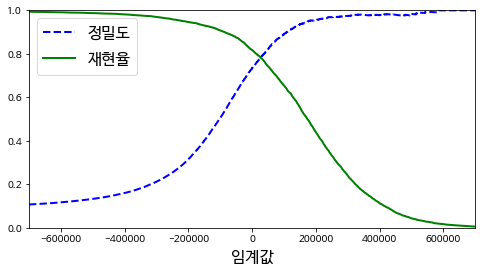

In [41]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율", linewidth=2)
    plt.xlabel("임계값", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

.

- 정밀도와 재현율 그래프를 보고 인사이트를 얻을 수 있음

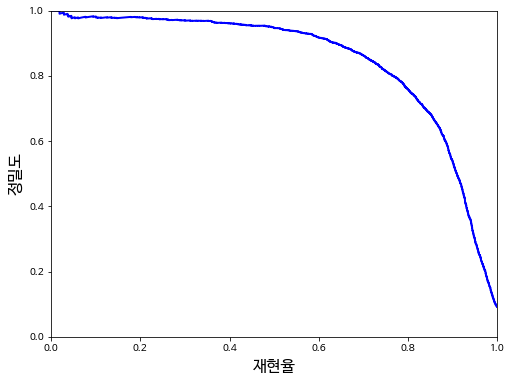

In [42]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("재현율", fontsize=16)
    plt.ylabel("정밀도", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

- 정밀도 90%가 목표라고 하자.

In [43]:
y_train_pred_90 = (y_scores > 70000) ##대충보고... 임계값을 설정

In [44]:
precision_score(y_train_5, y_train_pred_90) #정밀도 계산

0.855198572066042

In [45]:
recall_score(y_train_5, y_train_pred_90) #재현율 계산

0.7070651171370596

- 정밀도와 재현율을 상대적으로 비교해서 분류기를 만들어야함.

- 누군가가 '99% 정밀도를 달성하자'라고 말하면 반드시 '재현율 얼마에서?'라고 물어야함.

### 3.3.5 ROC 곡선

- 이진 분류 모델의 지표 중 하나
- 수신기 조작 특성(receiver operating characteristic)
- 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR, 재현율의 다른 이름) => 결국 FP와 FN을 관찰
- 거짓 양성 비율(FPR)= FP/(FP + TN) ##늘어나면 안 좋은 것

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

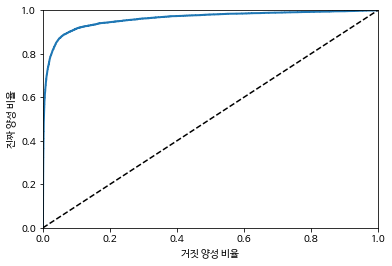

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율')
    plt.ylabel('진짜 양성 비율')

plot_roc_curve(fpr, tpr) ##양의 상관 관계

- 하지만 재현율과 트레이드오프 관계가 있음
- 좋은 분류기는 y=x 그래프와 최대한 멀리 떨어져 있어야 함
- 곡선 아래의 면적을 통해 분류기들을 비교할 수 있음  
=> AUG(area under the curve) 측정 

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9614189997126434

#### RandomForestClassifier와 SGDClassifier를 비교하자.

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [50]:
y_probas_forest

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ]])

In [51]:
y_scores_forest = y_probas_forest[:, 1]
## 확률을 함부로 점수로 써도 될까?
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [52]:
y_scores_forest

array([0. , 0. , 0. , ..., 0. , 0.1, 0. ])

#### Q. y_train_5와 y_socres_forest의 confusion_matrix를 구할 수 있는가?

In [53]:
confusion_matrix(y_train_5, y_scores_forest)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

불가능!!

#### Q. recall은 가능한가?

In [55]:
recall_score(y_train_5, y_scores_forest)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

불가능!!

- 확률을 사용하여 정밀도나 재현율을 직접 구하는 것은 못하지만, roc_curve를 위한 계산하는 것은 가능한듯.
- TN, FP, FN, TP를 소수점으로 계산을 할 수 있는 듯

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="랜덤 포레스트")
plt.legend(loc="lower right", fontsize=14)
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

- SGDClassifier보다 RandomForestClassifier가 더 좋은 것을 알 수 있음


- 추가로 정밀도와 재현율을 구해보자

In [56]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9870386643233744

In [57]:
recall_score(y_train_5, y_train_pred_forest)

0.8288138719793396

## 3.4 다중 분류

- 이진 분류가 두 개의 클래스를 구별한다면 다중 분류기는 둘 이상의 클래스를 구별할 수 있다.  


- 일부 알고리즘은 여러 개의 클래스를 직접 처리할 수 있지만, 몇 몇 알고리즘은 이진 분류만 가능하다.


- 이진 분류기를 여러 개 이용해 다중 클래스를 분류하는 기법도 있다.

- 일대다(OvA)전략: 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개(0에서 부터 9까지)를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있다. 이미지를 부류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하면 된다.
- 일대일(OvO)전략: 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련시키는 것이다. 따라서 클래스가 N개라면 분류기는 N * (N - 1) / 2개가 필요하다. 이미지 하나를 분류하려면 46개 분류기 모두를 통과시켜서 가장 많이 양성으로 분류된 클래스를 선택하면 된다.


- 일대일(OvO) 전략의 주요 장점은 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것이다.

예를 들어 서포트 벡터 머신 같은 일부 알고리즘은 훈련 세트의 크기에 민감해서 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠르다.

- 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 자동으로 감지해 OvA 혹은 OvO를 적용한다.

SGDClassifier 훈련

In [58]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4])

이는 10개의 분류기를 통과하면서 점수가 가장 높은 클래스를 선택한 것이다.

In [59]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-736165.13534356, -391182.59305387, -752094.90919363,
        -199593.6564959 ,  -33428.88555026, -176288.21703149,
        -856742.40238951, -145757.71304016, -253587.97052021,
        -249064.39096412]])

In [60]:
np.argmax(some_digit_scores)

4

In [61]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
sgd_clf.classes_[4]

4

보통은 sgd_clf.classes_[4]가 어떤건지 직관적으로 알기 어렵다.

.

- OvO나 OvA를 강제로 선택해 줄 수 있다.

In [63]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train) ##fit 매소드를 실행하면서 여러가지 객체 변수에 값을 집어넣음.
ovo_clf.predict([some_digit])

array([9])

In [64]:
len(ovo_clf.estimators_) ##분류기 개수

45

RandomForestClassifier 훈련

In [65]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([9])

- 분류기가 추정하는 정도

In [66]:
forest_clf.predict_proba([some_digit, X_train[10]])

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

- 분류기의 교차 검증

In [67]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring= 'accuracy')

array([0.81908618, 0.86379319, 0.84492674])

- 분류기에서도 scale조정을 하면 추정값이 좋아짐

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring ='accuracy')

array([0.91131774, 0.90884544, 0.90883633])

## 3.5 에러 분석

원칙적으로는 
1. 데이터 준비 단계에서 가능한 선택사항을 탐색하고, 
2. 여러 모델을 시도하고,   
3. 가장 좋은 몇 개를 골라 GridSearchCV를 사용해 하이퍼파라미터를 세밀하게 튜닝하고,   
4. 파이프라인을 통해 가능한 자동화해야한다.


- 하지만 이 절에서는 가능성이 높은 모델을 하나 찾았다고 가정하고 이 모델의 성능을 향상시킬 방법을 찾아보자.

- 한 가지 방법은 에러의 종류를 분석하는 것이다.

In [69]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3) ### 예상 값들을 출력
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    2,   22,    9,   11,   52,   47,    8,   39,    3],
       [   1, 6459,   54,   29,    6,   43,    6,   11,  123,   10],
       [  53,   34, 5371,   90,   80,   23,   79,   57,  157,   14],
       [  48,   37,  147, 5315,    3,  248,   36,   58,  143,   96],
       [  20,   25,   45,   10, 5338,   10,   49,   36,   87,  222],
       [  72,   40,   38,  170,   72, 4616,  108,   28,  186,   91],
       [  35,   24,   56,    1,   39,   86, 5622,    6,   49,    0],
       [  22,   20,   73,   28,   48,   12,    4, 5832,   18,  208],
       [  53,  146,   84,  152,   14,  147,   55,   27, 5037,  136],
       [  44,   33,   29,   89,  164,   39,    3,  211,   77, 5260]],
      dtype=int64)

row = 실제 값, column = 추정 값

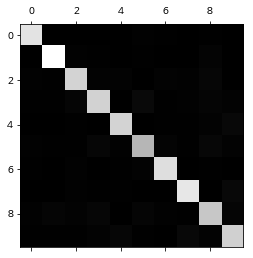

In [70]:
plt.matshow(conf_mx, cmap=plt.cm.gray) ## 직관적 비교를 위해
plt.show()

- 지금은 샘플의 절대 개수에 따라 측정된 값이므로 샘플의 상대적 개수를 알아내야 함.

In [71]:
row_sums = conf_mx.sum(axis=1, keepdims=True) ##keepdims는 밑에서...
norm_conf_mx = conf_mx / row_sums

###### keepdims

In [72]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a.sum(axis=1)  ### 2에서 1로 dim이 떨어짐

array([ 6, 15, 24])

In [73]:
a.sum(axis=1, keepdims=True) ### column을 유지하고 dim도 유지

array([[ 6],
       [15],
       [24]])

In [74]:
a.sum(axis= 0, keepdims= True) ### row를 유지하고 dim도 유지

array([[12, 15, 18]])

In [75]:
a.sum(keepdims=True)  ### dim 유지

array([[45]])

keepdims

- 가운데를 0으로 만들고 다시 관찰 
(오차 부분의 색 대조를 위해)

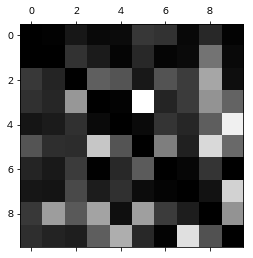

In [76]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- 여러가지 분석을 할 수 있음.


8과 9의 열이 상당히 밝으므로 많은 이미지가 8과 9로 잘못 분류되었음을 암시.  
8과 9의 행도 밝으므로 숫자 8과 9가 다른 숫자들과 혼돈이 자주 됨.  
1의 열은 매우 어두우므로 대부분의 숫자 1이  정확하게 분류되었음을 의미.  
에러는 대각선 기준 대칭이 아님.

###### 참고. 개개의 에러 분석. 하지만 이는 더 어렵고 시간이 오래 걸림

In [77]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

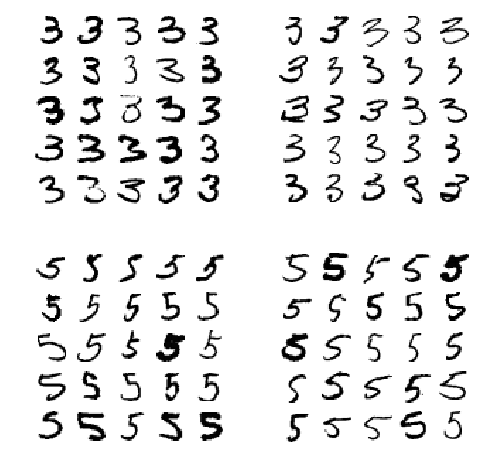

In [78]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 3.6 다중 레이블 분류

- 분류를 하다보면 한 샘플이 여러 클래스에 속할 때가 있음.
- 이를 위해 다중 레이블 분류 시스템을 사용해야함.


- 이를 위한 분류기 중 KNeighborsClassifier가 있음

In [79]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  See Also
 |  --------
 |  column_stack : Stack 1-D arrays as columns into a 2-D array.
 |  r_ : For more detailed documentation.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
 |  array([[1, 4],
 |         [2, 5],
 |         [3, 6]])
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |    

some_digit에 대해 잘 추정하는지 확인

In [81]:
knn_clf.predict([some_digit])

array([[ True,  True]])

밑에 있는 두 코드는 실행시간이 매우 오래 걸림

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)  
f1_score(y_multilabel, y_train_knn_pred, average="macro")

help(cross_val_predict)

## 3.7 다중 출력 분류 

- 다중 출력 다중 클래스 분류: 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것.


- ex) 노이즈 제거

In [82]:
len(X_train)

60000

In [83]:
X_train.shape

(60000, 784)

In [84]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

- 노이즈가 들어간 샘플을 만들어 보자

In [85]:
noise = np.random.randint(low=0, high = 100, size = X_train.shape)

In [86]:
noise = np.random.randint(0,100, (len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [87]:
X_test_mod[5500].shape

(784,)

- 노이즈가 들어간 샘플을 그려보자.

In [88]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

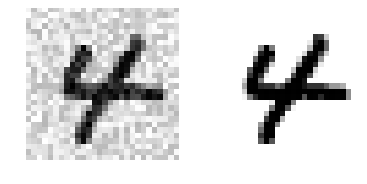

In [89]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

- 샘플들을 훈련 시키고, 노이즈가 들어간 샘플을 모델에 넣으면, 알고리즘이 샘플의 값(픽셀)들을  추정하고 출력함(다중 출력)

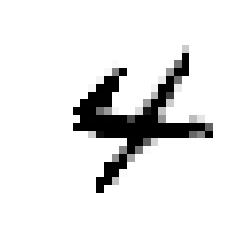

In [90]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)